In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import pymorphy3
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
stop_words = stopwords.words('russian')
morph = pymorphy3.MorphAnalyzer()

In [26]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    :param raw_text: исходная текстовая строка
    """
    # Разбиение на сслова при помощи пробела
    words = raw_text.split()
    # Подготовка регулярного выражения для фильтрации символов
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # Удаление знаков препинания
    stripped = [re_punc.sub('', w) for w in words]
    # Приведение всех слов к нижнему регистру
    words_lower = [w.lower() for w in stripped]
    # Удаление оставшихся токенов, которые не являются буквами
    words_alpha = [word for word in words_lower if word.isalpha()]
    # Удаление стоп-слов    
    words_stop = [w for w in words_alpha if not w in stop_words]
    # Лемматизация    
    tokens = [morph.parse(token)[0].normal_form for token in words_stop]
    # Удалим короткие токены
    tokens = [word for word in tokens if len(word) > 1]

    return tokens

### Посты

In [28]:
df_posts = pd.read_csv('posts_politics.csv', index_col = 0)
df_posts.head()

,post_id,date,post_text
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...
1,2192593,2025-05-11,NaN
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...


In [30]:
df_posts.shape

(1000, 3)

In [32]:
df_posts.dropna(inplace=True)
df_posts.shape

(736, 3)

In [34]:
# применяем функцию к датафрейму с помощью метода .apply()
tokenized= df_posts['post_text'].apply(tokenize_text)

In [35]:
# добавляем новую колонку в исходный датафрейм
df_posts = df_posts.assign(tokenized=tokenized)
df_posts.head()

,post_id,date,post_text,tokenized
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"[сми, взбудоражить, предложение, путин, провес..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"[wsj, сообщить, признание, трамп, сложность, р..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"[ездить, зеленский, допинг, войти, купе, старм..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"[зеленский, ответить, предложение, путин, пере..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"[фицо, ответить, критика, каллас, изз, визит, ..."


In [ ]:
df_posts.to_csv('posts_tokenised.csv')

In [38]:
words_list_posts = list(df_posts['tokenized'])

In [40]:
all_words_posts = np.concatenate(words_list_posts)

In [42]:
all_words_freq_posts = FreqDist(all_words_posts)
print("Наиболлее популярные слова: ", all_words_freq_posts.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_posts.keys()))

Наиболлее популярные слова:  [('украина', 1511), ('который', 1253), ('это', 1209), ('россия', 1188), ('сша', 874), ('год', 745), ('трамп', 717), ('украинский', 695), ('свой', 623), ('зеленский', 558), ('страна', 549), ('российский', 504), ('война', 496), ('наш', 479), ('военный', 473), ('президент', 465), ('киев', 439), ('заявить', 412), ('европа', 395), ('американский', 391), ('время', 355), ('тот', 340), ('стать', 339), ('сторона', 337), ('всу', 332), ('также', 328), ('день', 328), ('мир', 325), ('такой', 325), ('новый', 301), ('москва', 296), ('конфликт', 289), ('победа', 288), ('слово', 282), ('человек', 279), ('должный', 277), ('быть', 277), ('один', 274), ('территория', 273), ('весь', 271), ('говорить', 264), ('сам', 263), ('европейский', 261), ('сила', 258), ('мочь', 256), ('область', 247), ('глава', 239), ('переговоры', 237), ('этот', 237), ('первый', 236), ('путин', 235), ('вопрос', 235), ('власть', 234), ('другой', 233), ('самый', 232), ('русский', 232), ('май', 227), ('хотет

C:\Temp\ipykernel_19484\2813328749.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


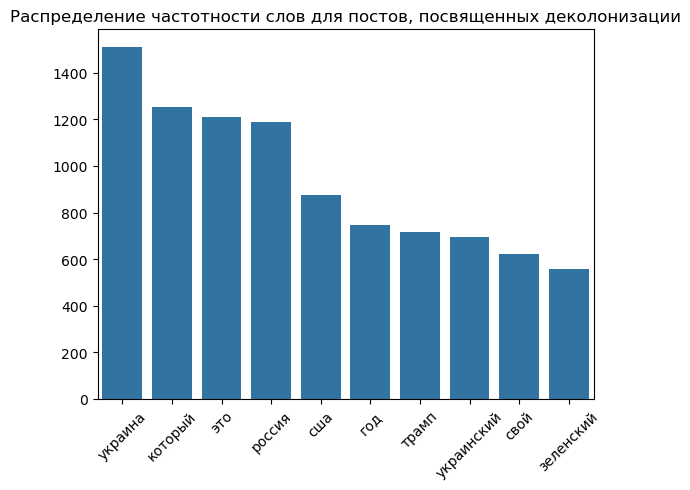

In [44]:
count, words = [], []
for w in all_words_freq_posts.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов, посвященных деколонизации')
plt.show()

In [46]:
df = pd.read_csv('posts_tokenised.csv',index_col=0)
df.head()

,post_id,date,post_text,tokenized
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз..."


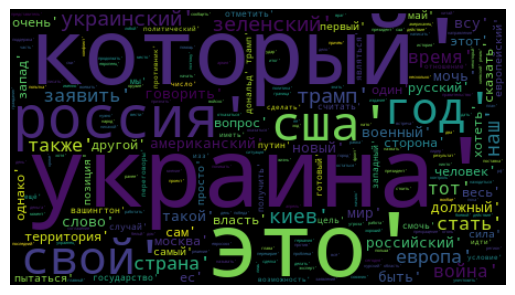

In [48]:
textt = ''.join(w for w in df.tokenized)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('neokolonialism.jpg')
plt.show()

In [112]:
df = pd.read_csv('posts_tokenised.csv',index_col=0)
df.head()

,post_id,date,post_text,tokenized
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз..."


In [114]:
stop_words_ex = ['который','это', 'год','тот','также','такой','этот','wsj' ]

In [116]:
stop_words = stop_words + stop_words_ex

In [118]:
stop_words

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [120]:
def full_stop_words (text):
    words = [word for word in text if not word in stop_words]
    return words

In [122]:
df["pure_tokens"] = df["tokenized"].apply(full_stop_words)

In [123]:
df.head()

,post_id,date,post_text,tokenized,pure_tokens
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","[[, ', м, ', ,, , ', з, б, д, р, т, ь, ', ,, ..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","[[, ', w, s, j, ', ,, , ', б, щ, т, ь, ', ,, ..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","[[, ', е, з, д, т, ь, ', ,, , ', з, е, л, е, ..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","[[, ', з, е, л, е, н, й, ', ,, , ', т, е, т, ..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","[[, ', ф, ц, ', ,, , ', т, е, т, т, ь, ', ,, ..."


In [94]:
pure_tokens = full_stop_words(df['tokenized'])

In [80]:
# применяем функцию к датафрейму с помощью метода .apply()
pure_tokens= df['tokenized'].apply(full_stop_words)

In [96]:
# добавляем новую колонку в исходный датафрейм
df = df.assign(pure_tokens=pure_tokens)
df.head()

,post_id,date,post_text,tokenized,pure_tokens
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","['сми', 'взбудоражить', 'предложение', 'путин'..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","['wsj', 'сообщить', 'признание', 'трамп', 'сло..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","['ездить', 'зеленский', 'допинг', 'войти', 'ку..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","['зеленский', 'ответить', 'предложение', 'пути..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","['фицо', 'ответить', 'критика', 'каллас', 'изз..."


In [ ]:
words_list_posts = list(df['pure_tokens'])

In [ ]:
all_words_posts = np.concatenate(words_list_posts)

In [ ]:
all_words_freq_posts = FreqDist(all_words_posts)
print("Наиболлее популярные слова: ", all_words_freq_posts.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_posts.keys()))

In [ ]:
count, words = [], []
for w in all_words_freq_posts.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов, посвященных деколонизации')
plt.show()

In [ ]:
df.to_csv('pure_posts_tokens.csv')

In [ ]:
df = pd.read_csv('pure_posts_tokens.csv',index_col=0)
df.head()

In [ ]:
textt = ''.join(w for w in df.pure_tokens)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('neokolonialism.jpg')
plt.show()

### Комментарии

In [ ]:
df_comments = pd.read_csv('comments_politics.csv', index_col = 0)
df_comments.head()

In [ ]:
df_comments.shape

In [ ]:
df_comments.dropna(inplace=True)
df_comments.shape

In [ ]:
# применяем функцию к датафрейму с помощью метода .apply()
tokenized= df_comments['comments_text'].apply(tokenize_text)

In [ ]:
# добавляем новую колонку в исходный датафрейм
df_comments = df_comments.assign(tokenized=tokenized)
df_comments.head()

In [ ]:
df_comments.to_csv('comments_tokenised.csv')

In [ ]:
words_list_comments = list(df_comments['tokenized'])

In [ ]:
all_words_comments = np.concatenate(words_list_comments)

In [ ]:
all_words_freq_comments = FreqDist(all_words_comments)
print("Наиболлее популярные слова: ", all_words_freq_comments.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_comments.keys()))

In [ ]:
count, words = [], []
for w in all_words_freq_comments.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов, посвященных деколонизации')
plt.show()

In [7]:
df = pd.read_csv('comments_tokenised.csv',index_col=0)
df.head()

,post_id,comments_text,tokenized
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту,"['единственный', 'способуничтожить', 'бандеров..."
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер...","['странно', 'раз', 'сказалотличный', 'перегово..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...,"['конечноести', 'террорист', 'продолжать', 'по..."
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ...","['трамп', 'наскок', 'хотеть', 'решить', 'хотя'..."
5,2192555.0,Ужас .. Они там все торчат на кокаине. Не мудр...,"['ужас', 'торчать', 'кокаин', 'мудрено', 'торч..."


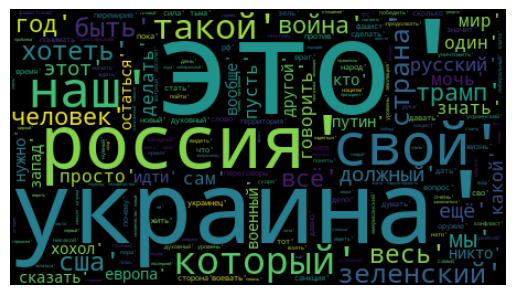

In [9]:
textt = ''.join(w for w in df.tokenized)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('neokolonialism.jpg')
plt.show()

In [11]:
stop_words_ext = ['который','это', 'такой','этот','год','какой','кто' ]

In [13]:
def stop_words_new (text):
    words = [word for word in text if not word in stop_words_ext]
    return words

In [18]:
# применяем функцию к датафрейму с помощью метода .apply()
pure_tokens= df['tokenized'].apply(stop_words_new)

In [20]:
pure_tokens

0       [[, ', е, д, и, н, с, т, в, е, н, н, ы, й, ', ...
2       [[, ', с, т, р, а, н, н, о, ', ,,  , ', р, а, ...
3       [[, ', к, о, н, е, ч, н, о, е, с, т, и, ', ,, ...
4       [[, ', т, р, а, м, п, ', ,,  , ', н, а, с, к, ...
5       [[, ', у, ж, а, с, ', ,,  , ', т, о, р, ч, а, ...
                              ...                        
5839                          [[, ', к, л, о, у, н, ', ]]
5840    [[, ', и, з, в, л, е, к, а, т, ь, ', ,,  , ', ...
5843    [[, ', п, р, а, в, и, л, ь, н, о, ', ,,  , ', ...
5844    [[, ', в, а, ш, и, н, г, т, о, н, ', ,,  , ', ...
5845    [[, ', ч, у, д, н, о, й, ', ,,  , ', д, е, л, ...
Name: tokenized, Length: 4926, dtype: object

In [17]:
# добавляем новую колонку в исходный датафрейм
df_com = df_com.assign(pure_tokens=pure_tokens)
df_com.head()

,post_id,comments_text,tokenized,pure_tokens
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту,"['единственный', 'способуничтожить', 'бандеров...","[[, ', е, д, и, н, с, т, в, е, н, н, ы, й, ', ..."
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер...","['странно', 'раз', 'сказалотличный', 'перегово...","[[, ', с, т, р, а, н, н, о, ', ,, , ', р, а, ..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...,"['конечноести', 'террорист', 'продолжать', 'по...","[[, ', к, о, н, е, ч, н, о, е, с, т, и, ', ,, ..."
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ...","['трамп', 'наскок', 'хотеть', 'решить', 'хотя'...","[[, ', т, р, а, м, п, ', ,, , ', н, а, с, к, ..."
5,2192555.0,Ужас .. Они там все торчат на кокаине. Не мудр...,"['ужас', 'торчать', 'кокаин', 'мудрено', 'торч...","[[, ', у, ж, а, с, ', ,, , ', т, о, р, ч, а, ..."
